# Mental Health

## Ruh sağlığı, insanların yaşamlarının ve toplumun önemli bir parçasıdır. Kötü ruh sağlığı, refahımızı, çalışma yeteneğimizi ve arkadaşlarımız, ailemiz ve toplumla olan ilişkilerimizi etkiler. Her yıl yüz milyonlarca kişi bu rahatsızlıklardan muzdarip olmakta ve çok daha fazlası da yaşamları boyunca bu rahatsızlıkları yaşamaktadır. Her 3 kadından 1'inin ve her 5 erkekten 1'inin hayatları boyunca majör depresyon yaşayacağı tahmin edilmektedir. Şizofreni ve bipolar bozukluk gibi diğer rahatsızlıklar daha az yaygındır ancak yine de insanların yaşamları üzerinde büyük bir etkiye sahiptir.

# Veri seti ruh sağlığına odaklanmakta ve bireylerin ruh sağlığı sorunları ile ilgili deneyimleri ve refahları hakkında bilgi sağlamaktadır. Yaş, cinsiyet, eğitim ve ruh sağlığı endişeleri, tedavi ve sosyal destekle ilgili anket yanıtları gibi çeşitli sütunları içerir. Bu veriler, kalıpları anlamak, risk faktörlerini belirlemek ve ruh sağlığı hizmetlerini iyileştirmek amacıyla analiz ve araştırma için kullanılabilir.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("Mental_illnesses_Prevalence.csv")
data.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [8]:
data.columns #  Veri için sütun adlarını tanımlama.

Index(['Entity', 'Code', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'],
      dtype='object')

In [10]:
data

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [12]:
#Eksik verileri bulmak.
print(data.isnull().sum())

Entity                                                                                 0
Code                                                                                 270
Year                                                                                   0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized      0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized         0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized            0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized            0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized             0
dtype: int64


In [14]:
# Code dizisinde 270 adet eksik veri bulunuyor. Bu veriyi mod (en yaygın değer) ile dolduruyoruz.
most_frequent_code = data['Code'].mode()[0]  # Modu bulma
data['Code'].fillna(most_frequent_code, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_31540\1337509275.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Code'].fillna(most_frequent_code, inplace=True)


In [16]:
data.describe() # Sütunların istatiksel özeti.

,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,2004.500000,0.266604,3.767036,4.101840,0.636968,0.195664
std,8.656116,0.039383,0.925286,1.050543,0.233391,0.138380
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,2004.500000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,2012.000000,0.286575,4.366252,4.564164,0.844406,0.251167
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


In [18]:
# Regresyon Grafiği

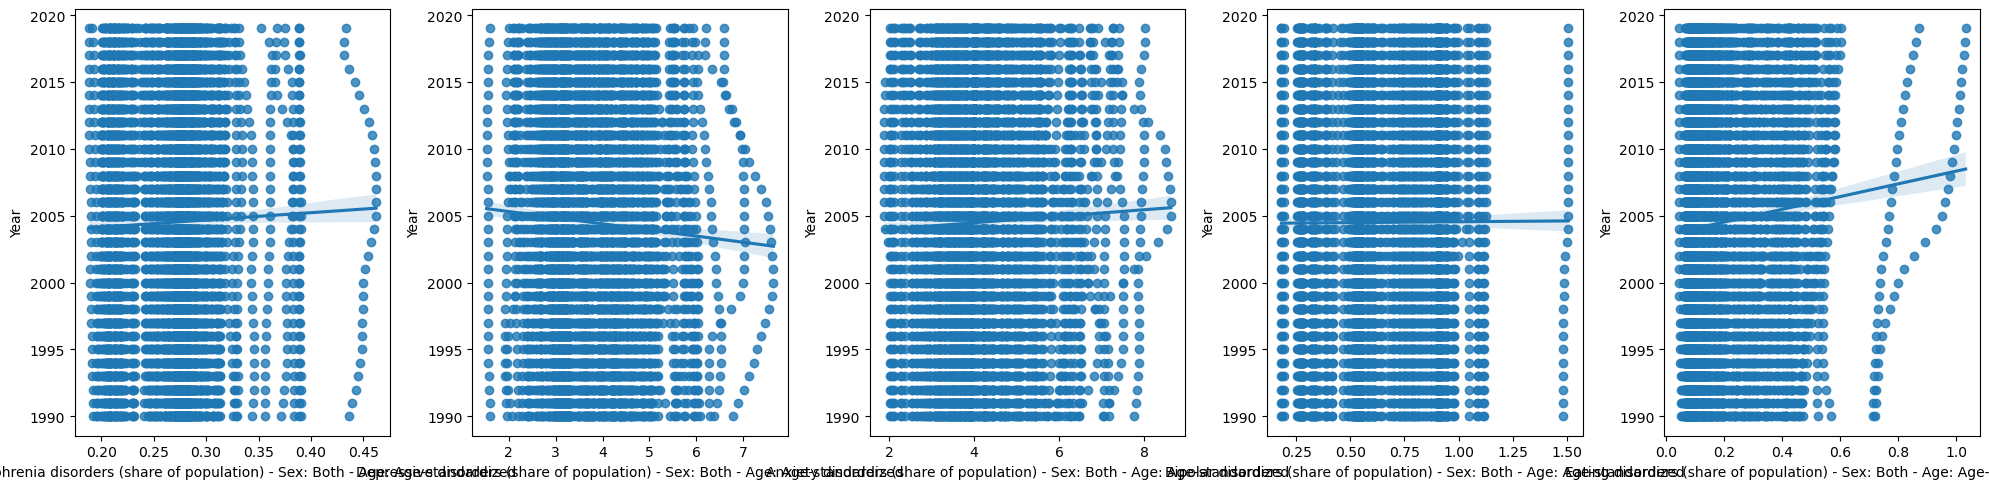

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(20, 5))
df = pd.DataFrame(data)
# Her Ekseni Ayrı Tanımlıyoruz

ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# Verileri Ayrı Eksende Görselleştirme

sns.regplot(ax=ax1, x='Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 
            y='Year', data=df)
sns.regplot(ax=ax2, x='Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', 
            y='Year', data=df)
sns.regplot(ax=ax3, x='Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized', 
            y='Year', data=df)
sns.regplot(ax=ax4, x='Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized', 
            y='Year', data=df)
sns.regplot(ax=ax5, x='Eating disorders (share of population) - Sex: Both - Age: Age-standardized', 
            y='Year', data=df)

#Grafikleri Gösterme
plt.tight_layout()
plt.show()

Kod, her bir alt grafiğin bir regresyon grafiği (sns.regplot) göstereceği beş alt grafiğe (ax1 ila ax5 kullanarak) sahip bir şekil oluşturur. Her bir regresyon grafiği, df veri kümesini kullanarak bir ruh sağlığı bozukluğunun yıllar boyunca nüfus içindeki payını (x ekseni) yılın kendisiyle (y ekseni) karşılaştırır. Bozukluklar arasında şizofreni, depresyon, anksiyete, bipolar bozukluk ve yeme bozuklukları yer almaktadır. Bu, her bir bozukluk için zaman içindeki eğilimleri görselleştirmeye yardımcı olur.

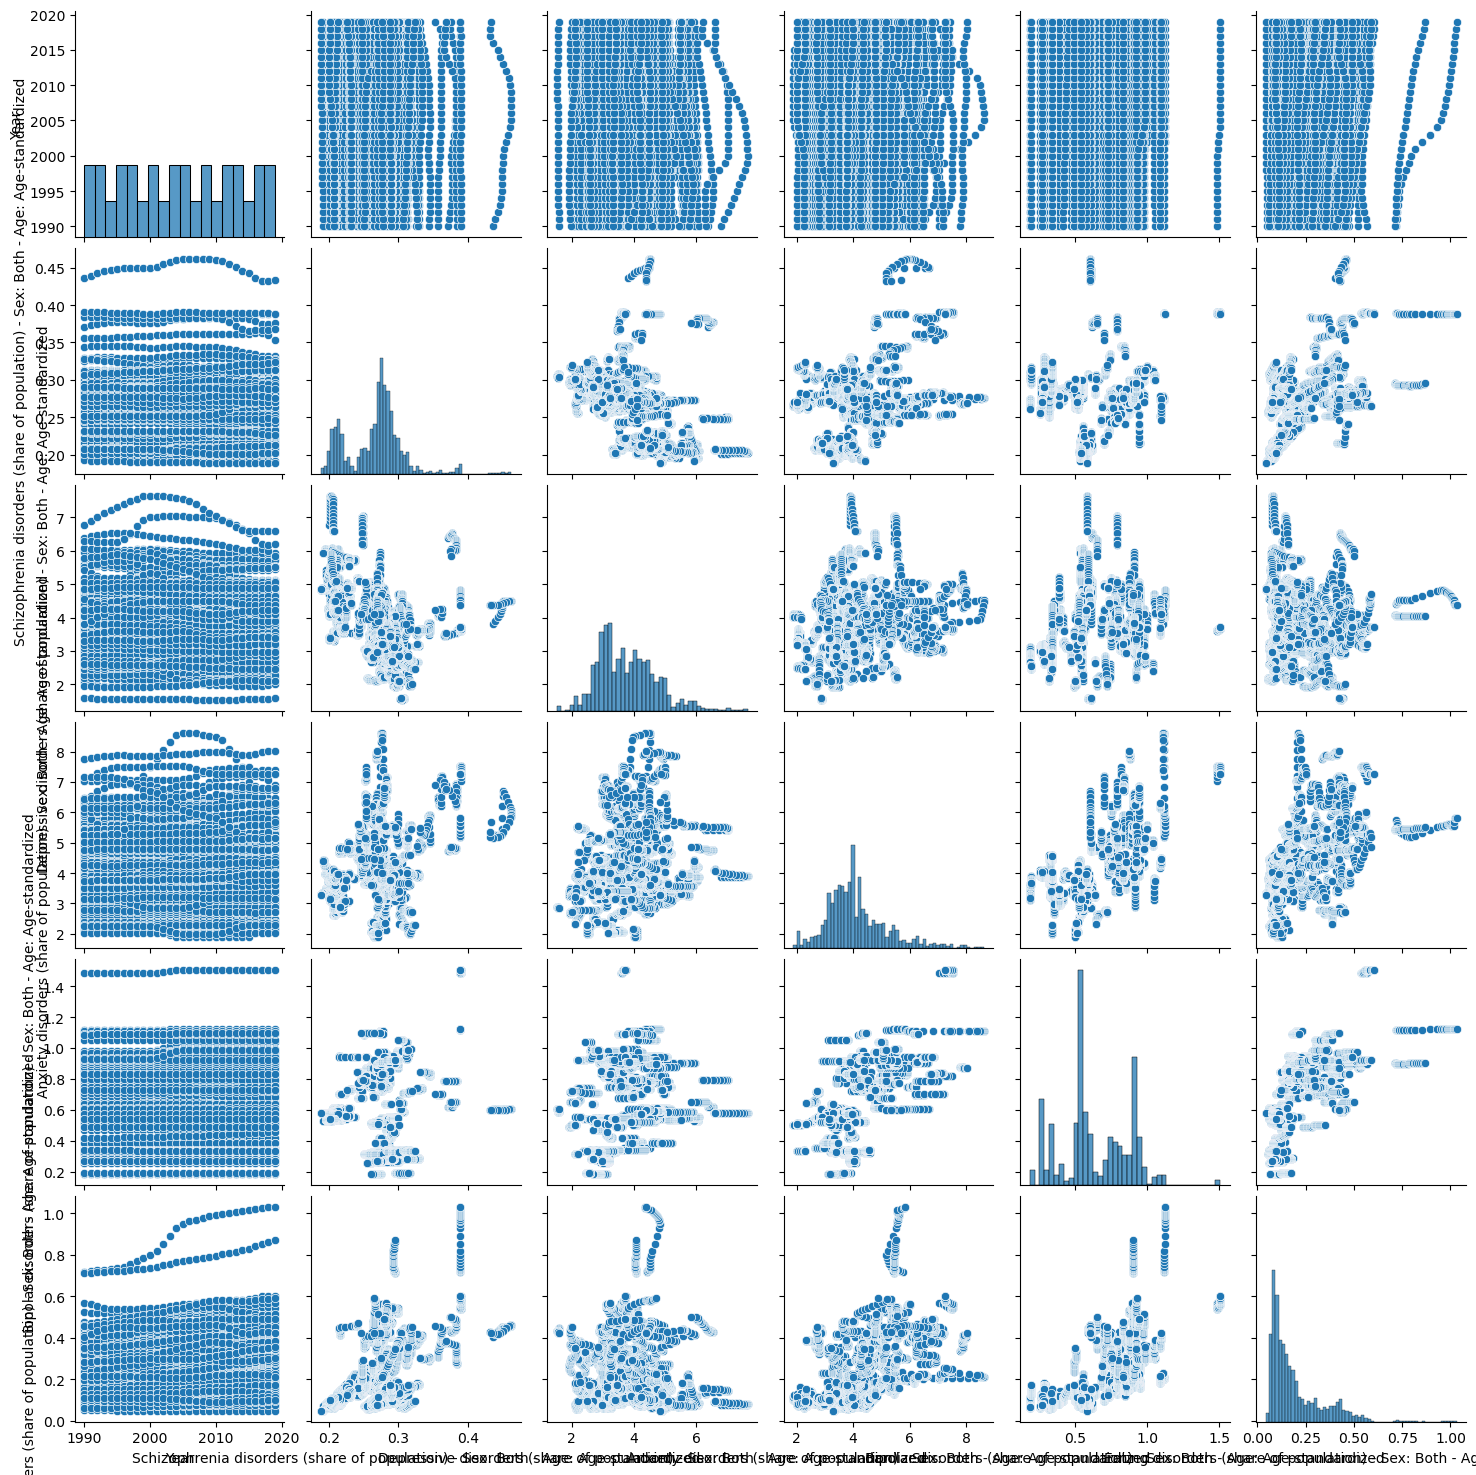

In [22]:
sns.pairplot(data)

# LINEAR REGRESSION

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Bağımlı ve bağımsız değişkenleri ayır
X = data.drop("Year", axis=1).select_dtypes(include=[float, int])  # Sayısal sütunlar
y = data["Year"]

# Eğitim ve test seti için veri bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression modelini oluşturma ve eğitme
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Tahminler
y_pred_lr = lr_model.predict(X_test)

# Performans değerlendirmesi (R² skoru)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R² Skoru: {r2_lr}")

# Tahmin sonuçlarını bir DataFrame'de göster
predictions_lr_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_lr})
print(predictions_lr_df.head())

Linear Regression R² Skoru: 0.015135156782123627
      Actual    Predicted
324     2014  2004.124697
1340    2010  2004.564589
6025    2015  2005.082790
2077    1997  2005.944930
381     2011  2008.630907


Doğrusal regresyon modeli, çeşitli ruh sağlığı bozukluklarının nüfus içindeki payına dayalı olarak hedef değişkeni tahmin etmek için uygulanmıştır. “Yıl” için katsayı 1'dir, bu da ‘Yıl ’daki her bir birim artış için bağımlı değişkenin 1 birim arttığını göstermektedir. Ancak, ruh sağlığı bozuklukları (Şizofreni, Depresyon, Anksiyete, Bipolar ve Yeme bozuklukları) için katsayılar son derece küçüktür, bu da bu özelliklerin bağımlı değişken üzerinde çok az etkisi olduğunu veya hiç etkisi olmadığını göstermektedir. Bu durum, bozuklukların nüfus içindeki payının bu modelde önemli belirleyiciler olmayabileceğini göstermektedir.

# POLYNOMIAL REGRESSION

In [28]:
# Değişkenlerin Tanımlanması
X = data.drop("Year", axis=1).select_dtypes(include=[np.number])  # Sayısal sütunlar
y = data["Year"]

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Polynomial özellikler oluşturmak
poly = PolynomialFeatures(degree = 2)  # 2. derece polinom
X_poly = poly.fit_transform(X)

# Linear Regression ile eğitmek
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Tahminler
y_pred_poly = poly_model.predict(X_poly)

# Performans değerlendirmesi (R² skoru)
r2_poly = r2_score(y, y_pred_poly)
print(f"Polynomial Regression R² Skoru: {r2_poly}")

# Tahmin sonuçlarını DataFrame'de göstermek
predictions_poly_df = pd.DataFrame({"Actual": y, "Predicted": y_pred_poly})
print(predictions_poly_df.head())

Polynomial Regression R² Skoru: 0.024615673221523582
   Actual    Predicted
0    1990  2003.885765
1    1991  2003.813461
2    1992  2003.737036
3    1993  2003.682720
4    1994  2003.642693


Polynomial Regresyon, bağımsız değişkenler ile bağımlı değişken arasındaki doğrusal olmayan ilişkileri yakalamayı amaçlamaktadır. Model sonuçlarına göre, “Yıl” değişkeni için katsayı, doğrusal regresyonda olduğu gibi güçlü bir ilişki göstermeye devam ederken, ruh sağlığı bozuklukları (Şizofreni, Depresyon, Anksiyete, Bipolar ve Yeme Bozuklukları) için katsayıların etkisinin doğrusal modele kıyasla bir miktar iyileştiği gözlemlenmiştir. Ancak bu katsayılar hâlâ oldukça küçüktür, bu da bozuklukların nüfus içindeki oranlarının bağımlı değişken üzerinde sınırlı bir etkisi olduğunu göstermektedir.

# Random Forest

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = data.drop("Year", axis=1).select_dtypes(include=[float, int])  # Sayısal sütunlar
y = data["Year"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini oluşturma ve eğitme
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Tahminler
y_pred_rf = rf_model.predict(X_test)

# Performans değerlendirmesi (R² skoru)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R² Skoru: {r2_rf}")

# Tahmin sonuçlarını DataFrame'de göstermek
predictions_rf_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_rf})
print(predictions_rf_df.head())

Random Forest R² Skoru: 0.9161204597968988
      Actual  Predicted
324     2014    2009.72
1340    2010    2011.07
6025    2015    2014.56
2077    1997    1997.39
381     2011    2011.23


Random Forest modeli, çeşitli ruh sağlığı bozukluklarının nüfus içindeki oranlarına dayanarak hedef değişken olan “Yıl”ı tahmin etmek için uygulanmıştır. Bu model, bağımsız değişkenler ile bağımlı değişken arasındaki doğrusal ve doğrusal olmayan ilişkileri yakalamak amacıyla çoklu karar ağaçlarının birleşimini kullanır. Model sonuçlarına göre, “Yıl” değişkeni güçlü bir belirleyici olmaya devam ederken, ruh sağlığı bozuklukları (Şizofreni, Depresyon, Anksiyete, Bipolar ve Yeme Bozuklukları) gibi değişkenlerin tahmin gücüne katkısının sınırlı olduğu gözlemlenmiştir. Özellikle, bu özelliklerin önem dereceleri düşük bulunmuş ve model performansını belirgin bir şekilde artırmadığı görülmüştür.

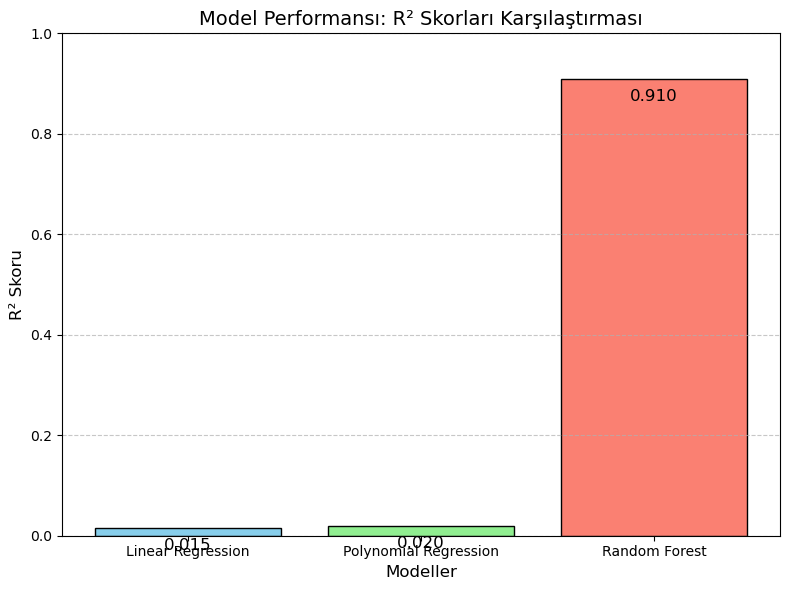

In [40]:
# Yapılan modellerin genel olarak gösterimi için bar grafiği

import matplotlib.pyplot as plt

# Modeller ve R² skorlarını yazmak
models = ['Linear Regression', 'Polynomial Regression', 'Random Forest']
r2_scores = [0.015, 0.02, 0.91]

# Bar grafiği oluşturmak için
plt.figure(figsize=(8, 6))
colors = ['skyblue', 'lightgreen', 'salmon']
bars = plt.bar(models, r2_scores, color=colors, edgecolor='black')

# Her bir barın üzerine R² skorunu yazdırmak
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05,
             f"{bar.get_height():.3f}", ha='center', va='bottom', fontsize=12, color='black')

# Grafik ayarları
plt.title("Model Performansı: R² Skorları Karşılaştırması", fontsize=14)
plt.xlabel("Modeller", fontsize=12)
plt.ylabel("R² Skoru", fontsize=12)
plt.ylim(0, 1)  # R² skorları 0 ile 1 arasında ölçeklendi
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Grafiğin gösterimi
plt.show()

Proje Amacı:
Bu çalışmada, çeşitli ruh sağlığı bozukluklarının (Şizofreni, Depresyon, Anksiyete, Bipolar ve Yeme Bozuklukları) nüfus içindeki oranlarının hedef değişken olan "Yıl" üzerindeki etkisi incelenmiştir. Farklı makine öğrenmesi modelleri kullanılarak, bu bağımsız değişkenlerin hedef değişken üzerindeki tahmin gücü değerlendirilmiştir.